1.1. Pandas df

In [74]:
import pandas as pd

df = pd.DataFrame({
    'Std-Name': ['Ali', 'Ahmed', 'Sara', 'Ali', 'Ahmed'],
    'Roll no': [101, 102, 103, 104, 105],
    'CPI': [75.5, 58.2, 82.1, 63.8, 55.9]
})

df_new = df[df['CPI'] > 60]

cpi_mean = df['CPI'].mean()
cpi_median = df['CPI'].median()
cpi_std = df['CPI'].std()

print("\nStudents with CPI > 60:")
print(df_new)
print("\nCPI Statistics:")
print(f"Mean: {cpi_mean:.2f}")
print(f"Median: {cpi_median:.2f}")
print(f"Standard Deviation: {cpi_std:.2f}")


Students with CPI > 60:
  Std-Name  Roll no   CPI
0      Ali      101  75.5
2     Sara      103  82.1
3      Ali      104  63.8

CPI Statistics:
Mean: 67.10
Median: 63.80
Standard Deviation: 11.30


1.2. Row/Column Sum

In [75]:
import pandas as pd

IIITG_library = pd.DataFrame({
    'Subjects': ['Maths', 'Physics', 'Chemistry', 'Maths', 'Physics'],
    'Book_Authors': ['R.D. Sharma', 'H.C. Verma', 'O.P. Tandon', 'S. Chand', 'Sumita Arora'],
    'No_of_Books': [100, 150, 200, 100, 250]
})

books_per_subject = IIITG_library.groupby('Subjects')['No_of_Books'].sum()

print("\nTotal Books per Subject:")
print("------------------------")
print(books_per_subject)



Total Books per Subject:
------------------------
Subjects
Chemistry    200
Maths        200
Physics      400
Name: No_of_Books, dtype: int64


1.3. Read image using NP, .csv using PD

In [76]:
import numpy as np
import pandas as pd
from PIL import Image

img_path = 'catto.jpg'
csv_path = 'catto.csv'

img = Image.open(img_path).convert('L')
img_array = np.array(img)

df = pd.DataFrame(img_array)
print(f"Original image shape: {df.shape}")
df.to_csv(csv_path, index=False)

df_new = pd.read_csv(csv_path)
df_new = df_new.iloc[:-1, :-1]
print(f"New image shape: {df_new.shape}")


Original image shape: (2804, 1862)
New image shape: (2803, 1861)


1.4. Pandas remove rows

In [77]:
import pandas as pd

dirty_data = pd.DataFrame({
    'Name': ['John', 'Alice', 'Bob', 'Emma', 'Mike', 'Sarah'],
    'Age': [25, 15, 30, 22, 17, 28],
    'Salary': [50000.0, 5000.0, -1000.0, 45000.0, 2000.0, 55000.0]
})

print("Original Data:")
print(dirty_data)

clean_data = dirty_data[(dirty_data['Age'] >= 18) & (dirty_data['Salary'] >= 0)]

print("\nCleaned Data:")
print(clean_data)

Original Data:
    Name  Age   Salary
0   John   25  50000.0
1  Alice   15   5000.0
2    Bob   30  -1000.0
3   Emma   22  45000.0
4   Mike   17   2000.0
5  Sarah   28  55000.0

Cleaned Data:
    Name  Age   Salary
0   John   25  50000.0
3   Emma   22  45000.0
5  Sarah   28  55000.0


1.5. Pandas TimeStamp

In [78]:
import pandas as pd
from datetime import datetime

time_df = pd.DataFrame({
    'TimeStamp': [
        '2024-03-15 09:30:00',
        '2024-03-15 14:45:00',
        '2024-03-15 18:15:00',
        '2024-03-15 23:50:00'
    ]
})
time_df['TimeStamp'] = pd.to_datetime(time_df['TimeStamp'])

time_df['Hour'] = time_df['TimeStamp'].dt.hour

print("DataFrame with Hour column:")
print(time_df)

DataFrame with Hour column:
            TimeStamp  Hour
0 2024-03-15 09:30:00     9
1 2024-03-15 14:45:00    14
2 2024-03-15 18:15:00    18
3 2024-03-15 23:50:00    23


2.1. NumPy Vectorized Operations

In [79]:
import numpy as np
import time

p = np.random.random((106, 104)) * 100
q = np.random.random((106, 104)) * 100
qt = q.T

m, n = p.shape    # m=106, n=104
k = qt.shape[0]   # k=106

start_time = time.time()
result_manual = np.zeros((m, k))
for i in range(m):
    for j in range(k):
        sum = 0
        for l in range(n):
            sum += p[i][l] * qt[j][l]
        result_manual[i][j] = sum
t1 = time.time() - start_time
print(f"Manual time (t1): {t1:.4f} seconds")

start_time = time.time()
result_numpy = p @ qt
time.sleep(0.0001)
t2 = time.time() - start_time

print(f"NumPy time (t2): {t2:.4f} seconds")

speedup = t1/t2
print(f"Speedup: {speedup:.2f}x")

Manual time (t1): 0.8513 seconds
NumPy time (t2): 0.0109 seconds
Speedup: 78.42x


2.2 Extract Row and Column from NumPy array

In [80]:
import numpy as np

arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

second_column = arr[:, 1]

last_row = arr[-1, :]

print("Original array:")
print(arr)
print("\nSecond column:")
print(second_column)
print("\nLast row:")
print(last_row)

Original array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Second column:
[ 2  6 10]

Last row:
[ 9 10 11 12]


2.3. Frequency of each unique number in 2D array

In [81]:
import numpy as np

arr = np.random.randint(10, size=(5, 6))

unique_values, counts = np.unique(arr, return_counts=True)

print("Original array:")
print(arr)
print("\nFrequencies:")
for value, count in zip(unique_values, counts):
    print(f"Value {value} occurs {count} times")

Original array:
[[8 9 2 4 0 9]
 [9 4 2 5 5 9]
 [7 1 6 7 8 9]
 [9 4 1 2 9 2]
 [7 4 8 9 3 5]]

Frequencies:
Value 0 occurs 1 times
Value 1 occurs 2 times
Value 2 occurs 4 times
Value 3 occurs 1 times
Value 4 occurs 4 times
Value 5 occurs 3 times
Value 6 occurs 1 times
Value 7 occurs 3 times
Value 8 occurs 3 times
Value 9 occurs 8 times


2.4. Solve System of Linear Equations using Matrices

In [82]:
import numpy as np

n = 5

A = np.random.randint(10, size=(n, n))

b = np.random.randint(10, size=(n))

x = np.linalg.solve(A, b)

print("Matrix A:")
print(A)
print("\nVector b:")
print(b)
print("\nSolution x:")
print(x)

Matrix A:
[[1 1 5 7 2]
 [2 7 3 2 2]
 [5 9 0 2 8]
 [4 4 2 5 0]
 [4 2 4 2 2]]

Vector b:
[1 4 1 3 5]

Solution x:
[ 0.68176583  0.25911708  0.93205374 -0.52552783 -0.46122841]


2.5. Frequency of number in array

In [83]:
import numpy as np

scores = np.array([85, 92, 75, 85, 90, 92, 85, 75, 85, 92, 75, 85, 90, 92, 85, 75, 85, 92])

frequency = np.count_nonzero(scores == 85)

print(f"The score 85 appears {frequency} times in the dataset")

The score 85 appears 7 times in the dataset


2.6. NumPy LinAlg Eigenvectors

In [84]:
import numpy as np

A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors (as columns):")
print(eigenvectors)

Matrix A:
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

Eigenvalues:
[3.41421356 2.         0.58578644]

Eigenvectors (as columns):
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.19803081e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


2.7. NumPy Broadcasting

In [85]:
import numpy as np

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

col_means = np.mean(X, axis=0)
col_stds = np.std(X, axis=0)

X_standardized = (X - col_means) / col_stds

print("Original Matrix X:")
print(X)

print("\nColumn Means:")
print(col_means)

print("\nColumn Standard Deviations:")
print(col_stds)

print("\nStandardized Matrix:")
print(X_standardized)

Original Matrix X:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Column Means:
[4. 5. 6.]

Column Standard Deviations:
[2.44948974 2.44948974 2.44948974]

Standardized Matrix:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


2.8. SVD in NumPy

In [86]:
import numpy as np

M = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# Perform SVD
U, s, Vt = np.linalg.svd(M)

# Create diagonal matrix Sigma
Sigma = np.zeros(M.shape)
Sigma[:len(s), :len(s)] = np.diag(s)

# Display components
print("Original Matrix M:")
print(M)

print("\nU (left singular vectors):")
print(U)

print("\nΣ (singular values):")
print(Sigma)

print("\nV^T (right singular vectors transposed):")
print(Vt)

Original Matrix M:
[[1 2]
 [3 4]
 [5 6]]

U (left singular vectors):
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

Σ (singular values):
[[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]

V^T (right singular vectors transposed):
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


3.1. Book Inventory Visualization

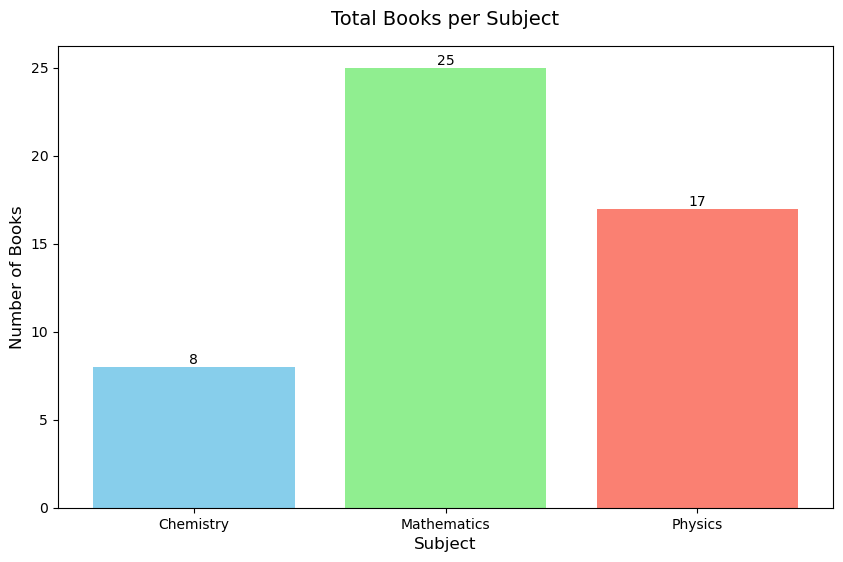

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Subject': ['Mathematics', 'Physics', 'Chemistry', 'Mathematics', 'Physics'],
    'Author': ['R.D. Sharma', 'H.C. Verma', 'O.P. Tandon', 'S.K. Goyal', 'Resnick'],
    'Quantity': [15, 12, 8, 10, 5]
}
df = pd.DataFrame(data)

books_by_subject = df.groupby('Subject')['Quantity'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(books_by_subject.index, books_by_subject.values, color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Total Books per Subject', fontsize=14, pad=15)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

3.2. Salary Distribution Visualization

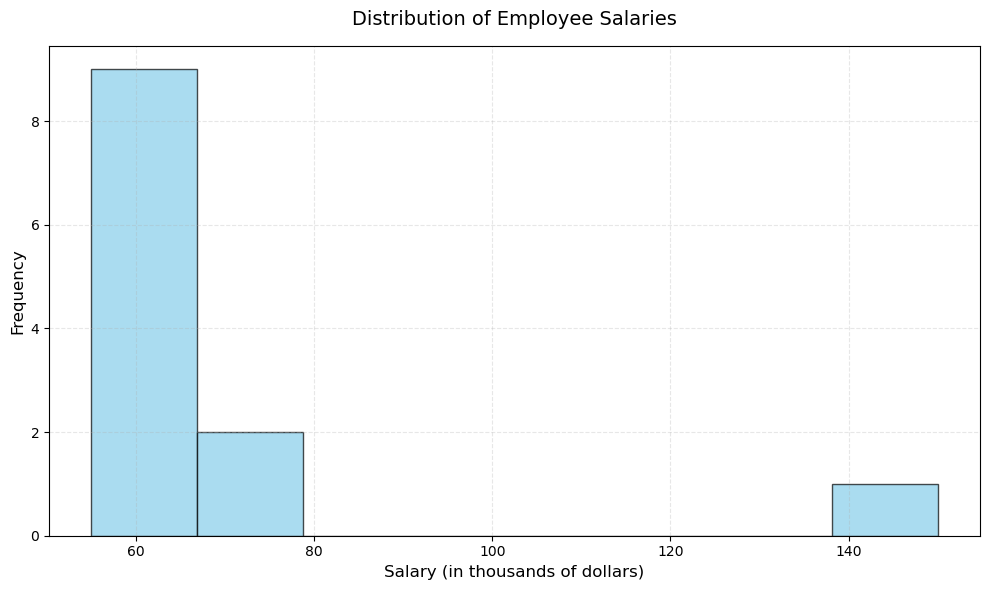

In [88]:
import numpy as np
import matplotlib.pyplot as plt

salaries = np.array([55, 62, 65, 58, 70, 55, 60, 68, 63, 55, 62, 150])

plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=8, edgecolor='black', color='skyblue', alpha=0.7)

plt.title('Distribution of Employee Salaries', fontsize=14, pad=15)
plt.xlabel('Salary (in thousands of dollars)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()

plt.show()